In [1]:
import gensim.downloader as api
api.load("word2vec-google-news-300")

In [2]:
wc = api.load("word2vec-google-news-300")

In [3]:
wc.similarity("great", "best")

0.5216034

In [8]:
wc.similarity(w1="profit", w2="gain")

0.28772825

In [4]:
wc.most_similar("cat")

[('cats', 0.8099379539489746),
 ('dog', 0.760945737361908),
 ('kitten', 0.7464984655380249),
 ('feline', 0.7326233983039856),
 ('beagle', 0.7150582671165466),
 ('puppy', 0.7075453996658325),
 ('pup', 0.6934291124343872),
 ('pet', 0.6891531348228455),
 ('felines', 0.6755931377410889),
 ('chihuahua', 0.6709762215614319)]

In [24]:
wc.most_similar(positive=["Marvel", "Batman"], negative=["Ironman"])

[('DC_Comics', 0.6781161427497864),
 ('Marvel_Comics', 0.6171078085899353),
 ('Superman_Batman', 0.5959319472312927),
 ('DC_Universe', 0.5888250470161438),
 ('comic_book', 0.5859229564666748),
 ('Nightwing', 0.5825390815734863),
 ('Superman', 0.5651789903640747),
 ('Wildstorm', 0.5521717071533203),
 ('Marvel_comics', 0.5504581928253174),
 ('superhero_comics', 0.5430452823638916)]

In [29]:
wc.doesnt_match(["iphone", "K20Pro", "OnePlus", "GalaxyS6", "Oppo"])

'iphone'

In [30]:
glv = api.load("glove-twitter-25")

[==================================================] 100.0% 104.8/104.8MB downloaded


In [42]:
glv.most_similar("lady")

[('aka', 0.9466415643692017),
 ('boy', 0.9414403438568115),
 ('kid', 0.9365534782409668),
 ('queen', 0.9336324334144592),
 ('girl', 0.9245244264602661),
 ('brother', 0.9188659191131592),
 ('king', 0.9163240194320679),
 ('little', 0.9138977527618408),
 ('old', 0.9097815752029419),
 ('big', 0.907889187335968)]

In [48]:
glv.doesnt_match("orange mango grape banana carot".split())

'carot'

In [51]:
c = "orange mango grape banana carot".split()
c

['orange', 'mango', 'grape', 'banana', 'carot']

In [61]:
" ".join(c)

'orange mango grape banana carot'

In [5]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Manu_workbook\Desktop\nlp\nlp-tutorials\16_word_vectors_gensim_text_classification\fake_and_real_news.csv")

In [6]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [89]:
df.label.value_counts()

Fake    5000
Real    4900
Name: label, dtype: int64

In [7]:
df['label_num'] = df.label.map({"Fake": 0, "Real": 1})

In [8]:
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [92]:
df.Text[1]

'U.S. conservative leader optimistic of common ground on healthcare WASHINGTON (Reuters) - Republicans in the U.S. House of Representatives could achieve common ground on a deal to win support for healthcare legislation on Thursday, after President Donald Trump intervened in negotiations, a conservative leader said on Wednesday. “We’re not there yet, but we’re very optimistic that if we work around the clock between now and Noon tomorrow, that we’re going to be able to hopefully find some common ground,” Representative Mark Meadows, chairman of the conservative House Freedom Caucus, told reporters. Meadows’ group has opposed House Republican healthcare legislation up to now and threatened earlier in the day to block its passage in a Thursday vote.  '

In [9]:
import spacy
nlp = spacy.load("en_core_web_lg")
def preprocess_and_vectorize(text):
    doc = nlp(text)
    filtered_token = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_token.append(token.lemma_)
        
    return wc.get_mean_vector(filtered_token)

In [12]:
preprocess_and_vectorize("king").shape

(300,)

In [13]:
preprocess_and_vectorize("U.S. conservative leader optimistic of common ground on healthcare WASHINGTON (Reuters) - Republicans in the U.S. House of Representatives could achieve common ground on a deal to win support for healthcare legislation on Thursday, after President Donald Trump intervened in negotiations, a conservative leader said on Wednesday. “We’re not there yet, but we’re very optimistic that if we work around the clock between now and Noon tomorrow, that we’re going to be able to hopefully find some common ground,” Representative Mark Meadows, chairman of the conservative House Freedom Caucus, told reporters. Meadows’ group has opposed House Republican healthcare legislation up to now and threatened earlier in the day to block its passage in a Thursday vote. ").shape

(300,)

In [14]:
df['vector'] = df.Text.apply(lambda x: preprocess_and_vectorize(x))

In [15]:
df.head()

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[0.008145372, 0.019952843, -0.00989356, 0.0344..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[0.00861828, 0.007408227, 0.0007675802, 0.0138..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[0.01823076, 0.0063306373, -0.0058634086, 0.03..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[0.012453172, 0.0122098895, 6.3027373e-06, 0.0..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.0022669104, 0.011340516, 0.003596399, 0.02..."


In [17]:
df.to_csv("fake_real_new_vectors.csv", index = False)

In [18]:
df.vector[:2]

0    [0.008145372, 0.019952843, -0.00989356, 0.0344...
1    [0.00861828, 0.007408227, 0.0007675802, 0.0138...
Name: vector, dtype: object

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values, 
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [20]:
X_train[:2]

array([array([-2.58219568e-03,  6.66544260e-03,  2.52646767e-03,  3.95730063e-02,
              -1.41182542e-02, -7.22123589e-03,  3.15938070e-02, -3.18326391e-02,
               1.62770562e-02,  2.15391051e-02, -2.36972049e-02, -3.72144543e-02,
              -6.70092739e-03,  1.64224133e-02, -2.48180293e-02,  4.60469536e-02,
               6.02065027e-03,  2.53213309e-02,  4.08343738e-03, -3.32745500e-02,
               6.01468608e-03,  1.92604307e-02,  4.28487025e-02, -2.15403945e-03,
               2.04510838e-02,  3.04712215e-03, -2.73784697e-02, -1.53319014e-03,
               6.67838380e-03, -3.27401888e-03, -1.53824072e-02,  9.19036320e-05,
              -2.74383668e-02, -3.54807038e-04, -1.12002371e-02, -1.66487973e-02,
               1.40579836e-02,  2.69189221e-03, -4.44610231e-03,  3.41382883e-02,
               5.02199680e-03, -1.35964267e-02,  4.29993980e-02,  1.10096289e-02,
              -5.67582203e-03, -1.63680799e-02, -2.08231565e-02,  8.67405720e-03,
              -1

In [21]:
# reshaping X_train and X_test 
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d  = np.stack(X_test)

In [22]:
# Applying Gradient Booster Classifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

clf = GradientBoostingClassifier()
clf.fit(X_train_2d, y_train)

y_pred = clf.predict(X_test_2d)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1000
           1       0.97      0.98      0.98       980

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



Text(33.22222222222222, 0.5, 'Truth')

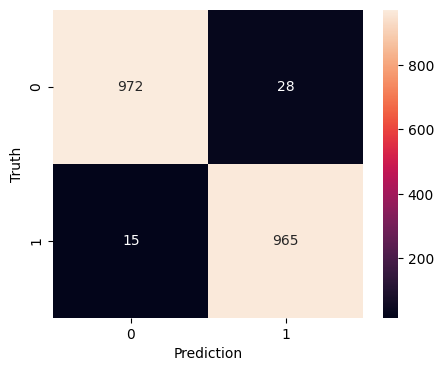

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [25]:
model_classifier = clf.fit(X_train_2d, y_train)

In [26]:
test_news = [
    "Michigan governor denies misleading U.S. House on Flint water (Reuters) - Michigan Governor Rick Snyder denied Thursday that he had misled a U.S. House of Representatives committee last year over testimony on Flintâ€™s water crisis after lawmakers asked if his testimony had been contradicted by a witness in a court hearing. The House Oversight and Government Reform Committee wrote Snyder earlier Thursday asking him about published reports that one of his aides, Harvey Hollins, testified in a court hearing last week in Michigan that he had notified Snyder of an outbreak of Legionnairesâ€™ disease linked to the Flint water crisis in December 2015, rather than 2016 as Snyder had testified. â€œMy testimony was truthful and I stand by it,â€ Snyder told the committee in a letter, adding that his office has provided tens of thousands of pages of records to the committee and would continue to cooperate fully.  Last week, prosecutors in Michigan said Dr. Eden Wells, the stateâ€™s chief medical executive who already faced lesser charges, would become the sixth current or former official to face involuntary manslaughter charges in connection with the crisis. The charges stem from more than 80 cases of Legionnairesâ€™ disease and at least 12 deaths that were believed to be linked to the water in Flint after the city switched its source from Lake Huron to the Flint River in April 2014. Wells was among six current and former Michigan and Flint officials charged in June. The other five, including Michigan Health and Human Services Director Nick Lyon, were charged at the time with involuntary manslaughter",
    " WATCH: Fox News Host Loses Her Sh*t, Says Investigating Russia For Hacking Our Election Is Unpatriotic This woman is insane.In an incredibly disrespectful rant against President Obama and anyone else who supports investigating Russian interference in our election, Fox News host Jeanine Pirro said that anybody who is against Donald Trump is anti-American. Look, it s time to take sides,  she began.",
    " Sarah Palin Celebrates After White Man Who Pulled Gun On Black Protesters Goes Unpunished (VIDEO) Sarah Palin, one of the nigh-innumerable  deplorables  in Donald Trump s  basket,  almost outdid herself in terms of horribleness on Friday."
]

pred = [preprocess_and_vectorize(i) for i in test_news]
model_classifier.predict(pred)

array([1, 0, 0], dtype=int64)

In [27]:
import pickle

filename = 'fake_news_classifier.sav'
pickle.dump(model_classifier, open(filename, 'wb'))

In [30]:
load_model = pickle.load(open('fake_news_classifier.sav', 'rb'))

In [31]:
test_news = [
    "Michigan governor denies misleading U.S. House on Flint water (Reuters) - Michigan Governor Rick Snyder denied Thursday that he had misled a U.S. House of Representatives committee last year over testimony on Flintâ€™s water crisis after lawmakers asked if his testimony had been contradicted by a witness in a court hearing. The House Oversight and Government Reform Committee wrote Snyder earlier Thursday asking him about published reports that one of his aides, Harvey Hollins, testified in a court hearing last week in Michigan that he had notified Snyder of an outbreak of Legionnairesâ€™ disease linked to the Flint water crisis in December 2015, rather than 2016 as Snyder had testified. â€œMy testimony was truthful and I stand by it,â€ Snyder told the committee in a letter, adding that his office has provided tens of thousands of pages of records to the committee and would continue to cooperate fully.  Last week, prosecutors in Michigan said Dr. Eden Wells, the stateâ€™s chief medical executive who already faced lesser charges, would become the sixth current or former official to face involuntary manslaughter charges in connection with the crisis. The charges stem from more than 80 cases of Legionnairesâ€™ disease and at least 12 deaths that were believed to be linked to the water in Flint after the city switched its source from Lake Huron to the Flint River in April 2014. Wells was among six current and former Michigan and Flint officials charged in June. The other five, including Michigan Health and Human Services Director Nick Lyon, were charged at the time with involuntary manslaughter",
    " WATCH: Fox News Host Loses Her Sh*t, Says Investigating Russia For Hacking Our Election Is Unpatriotic This woman is insane.In an incredibly disrespectful rant against President Obama and anyone else who supports investigating Russian interference in our election, Fox News host Jeanine Pirro said that anybody who is against Donald Trump is anti-American. Look, it s time to take sides,  she began.",
    " Sarah Palin Celebrates After White Man Who Pulled Gun On Black Protesters Goes Unpunished (VIDEO) Sarah Palin, one of the nigh-innumerable  deplorables  in Donald Trump s  basket,  almost outdid herself in terms of horribleness on Friday."
]

pred = [preprocess_and_vectorize(i) for i in test_news]
load_model.predict(pred)

array([1, 0, 0], dtype=int64)